In [1]:
import re
import pandas as pd

In [2]:
f=open('_chat.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
pattern = r'\[\d{2}\/\d{2}\/\d{4}, \d{2}:\d{2}:\d{2}\]\s$'



In [5]:
print(data)

[20/04/2025, 22:37:25] SAHA INSTITUTE SUNNY SIR: ‎Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them.
[20/04/2025, 22:37:25] SAHA INSTITUTE SUNNY SIR: ‎This chat has added privacy for your phone number. Tap to learn more.
[20/04/2025, 22:37:25] Sunny Sir: ‎Sunny Sir created the community “SAHA INSTITUTE SUNNY SIR”
[20/04/2025, 23:06:35] Sunny Sir: ‎Welcome to the community!
[21/04/2025, 15:12:46] Sunny Sir: Dear Students,

I hope you're all doing well!

To build a more supportive and inspiring learning environment, I kindly request you to share your achievements, current college or job status, and place of work (if applicable) in this group. Your journey can be a great source of motivation and guidance for fellow students.

Also, feel free to ask your queries related to your study plans, exam preparation, or career path—whether it's about choosing the right college, preparing for entrance exams, or job-related decisions. Let’s use t

In [6]:
import re

pattern = r"\[\d{2}/\d{2}/\d{4}, \d{2}:\d{2}:\d{2}\]\s"
messages = re.split(pattern, data)

# remove any empty strings
messages = [m.strip() for m in messages if m.strip()]

print(len(messages))



38


In [7]:
dates=re.findall(pattern,data)
dates

['[20/04/2025, 22:37:25] ',
 '[20/04/2025, 22:37:25] ',
 '[20/04/2025, 22:37:25] ',
 '[20/04/2025, 23:06:35] ',
 '[21/04/2025, 15:12:46] ',
 '[21/04/2025, 16:18:26] ',
 '[21/04/2025, 16:20:33] ',
 '[21/04/2025, 19:52:39] ',
 '[21/04/2025, 19:57:12] ',
 '[21/04/2025, 20:03:14] ',
 '[21/04/2025, 22:46:26] ',
 '[26/04/2025, 15:53:05] ',
 '[26/04/2025, 15:53:21] ',
 '[26/04/2025, 16:06:14] ',
 '[26/04/2025, 16:06:26] ',
 '[28/04/2025, 21:25:05] ',
 '[28/04/2025, 21:28:40] ',
 '[01/05/2025, 21:06:10] ',
 '[02/05/2025, 15:13:45] ',
 '[02/05/2025, 15:14:57] ',
 '[03/05/2025, 21:27:02] ',
 '[03/05/2025, 21:29:44] ',
 '[19/05/2025, 19:02:18] ',
 '[20/05/2025, 09:56:05] ',
 '[03/06/2025, 19:33:27] ',
 '[03/06/2025, 20:12:22] ',
 '[04/06/2025, 08:40:31] ',
 '[11/06/2025, 21:17:21] ',
 '[11/06/2025, 21:20:43] ',
 '[24/06/2025, 14:43:04] ',
 '[06/07/2025, 09:36:10] ',
 '[06/07/2025, 09:43:36] ',
 '[06/07/2025, 13:12:09] ',
 '[06/07/2025, 13:12:37] ',
 '[01/05/2025, 21:16:31] ',
 '[02/05/2025, 01:41

In [8]:
clean_dates = [d.strip().strip('[]') for d in dates]

print(clean_dates)

['20/04/2025, 22:37:25', '20/04/2025, 22:37:25', '20/04/2025, 22:37:25', '20/04/2025, 23:06:35', '21/04/2025, 15:12:46', '21/04/2025, 16:18:26', '21/04/2025, 16:20:33', '21/04/2025, 19:52:39', '21/04/2025, 19:57:12', '21/04/2025, 20:03:14', '21/04/2025, 22:46:26', '26/04/2025, 15:53:05', '26/04/2025, 15:53:21', '26/04/2025, 16:06:14', '26/04/2025, 16:06:26', '28/04/2025, 21:25:05', '28/04/2025, 21:28:40', '01/05/2025, 21:06:10', '02/05/2025, 15:13:45', '02/05/2025, 15:14:57', '03/05/2025, 21:27:02', '03/05/2025, 21:29:44', '19/05/2025, 19:02:18', '20/05/2025, 09:56:05', '03/06/2025, 19:33:27', '03/06/2025, 20:12:22', '04/06/2025, 08:40:31', '11/06/2025, 21:17:21', '11/06/2025, 21:20:43', '24/06/2025, 14:43:04', '06/07/2025, 09:36:10', '06/07/2025, 09:43:36', '06/07/2025, 13:12:09', '06/07/2025, 13:12:37', '01/05/2025, 21:16:31', '02/05/2025, 01:41:49', '02/05/2025, 07:06:23', '03/06/2025, 20:12:45']


In [9]:
df = pd.DataFrame({'user_message': messages, 'message_date': clean_dates})
    # convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M:%S')

df.rename(columns={'message_date': 'date'}, inplace=True)

In [10]:
df

,user_message,date
0,SAHA INSTITUTE SUNNY SIR: ‎Messages and calls ...,2025-04-20 22:37:25
1,SAHA INSTITUTE SUNNY SIR: ‎This chat has added...,2025-04-20 22:37:25
2,Sunny Sir: ‎Sunny Sir created the community “S...,2025-04-20 22:37:25
3,Sunny Sir: ‎Welcome to the community!,2025-04-20 23:06:35
4,"Sunny Sir: Dear Students,\n\nI hope you're all...",2025-04-21 15:12:46
5,Sunny Sir: ‎Sunny Sir changed this community’s...,2025-04-21 16:18:26
6,Jatin Chaudhary: Hey everyone!\n\nSuper excite...,2025-04-21 16:20:33
7,"Pankaj Sharma: Hey guys \nPankaj here, sunny s...",2025-04-21 19:52:39
8,"Sunny Sir: ""Ghayal parinda hai tu""\nUnique na...",2025-04-21 19:57:12
9,"Priyanshi: Hey guys,\nPriyanshi this side,\n\n...",2025-04-21 20:03:14


In [11]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\test\AppData\Local\Temp\ipykernel_2944\2129628564.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s', message)


In [12]:
df

,date,user,message
0,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎Messages and calls are end-to-end encrypted. ...
1,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎This chat has added privacy for your phone nu...
2,2025-04-20 22:37:25,Sunny Sir,‎Sunny Sir created the community “SAHA INSTITU...
3,2025-04-20 23:06:35,Sunny Sir,‎Welcome to the community!
4,2025-04-21 15:12:46,Sunny Sir,"Dear Students,\n\nI hope you're all doing well..."
5,2025-04-21 16:18:26,Sunny Sir,‎Sunny Sir changed this community’s settings t...
6,2025-04-21 16:20:33,Jatin Chaudhary,Hey everyone!\n\nSuper excited to be here wit...
7,2025-04-21 19:52:39,Pankaj Sharma,"Hey guys \nPankaj here, sunny sir were my ment..."
8,2025-04-21 19:57:12,Sunny Sir,"""Ghayal parinda hai tu""\nUnique name and it's..."
9,2025-04-21 20:03:14,Priyanshi,"Hey guys,\nPriyanshi this side,\n\nSunny sir m..."


In [13]:
df['year']=df['date'].dt.year

In [14]:
df

,date,user,message,year
0,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎Messages and calls are end-to-end encrypted. ...,2025
1,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎This chat has added privacy for your phone nu...,2025
2,2025-04-20 22:37:25,Sunny Sir,‎Sunny Sir created the community “SAHA INSTITU...,2025
3,2025-04-20 23:06:35,Sunny Sir,‎Welcome to the community!,2025
4,2025-04-21 15:12:46,Sunny Sir,"Dear Students,\n\nI hope you're all doing well...",2025
5,2025-04-21 16:18:26,Sunny Sir,‎Sunny Sir changed this community’s settings t...,2025
6,2025-04-21 16:20:33,Jatin Chaudhary,Hey everyone!\n\nSuper excited to be here wit...,2025
7,2025-04-21 19:52:39,Pankaj Sharma,"Hey guys \nPankaj here, sunny sir were my ment...",2025
8,2025-04-21 19:57:12,Sunny Sir,"""Ghayal parinda hai tu""\nUnique name and it's...",2025
9,2025-04-21 20:03:14,Priyanshi,"Hey guys,\nPriyanshi this side,\n\nSunny sir m...",2025


In [15]:
df['month']=df['date'].dt.month_name()

In [16]:
df['day']=df['date'].dt.day

In [17]:
df

,date,user,message,year,month,day
0,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎Messages and calls are end-to-end encrypted. ...,2025,April,20
1,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎This chat has added privacy for your phone nu...,2025,April,20
2,2025-04-20 22:37:25,Sunny Sir,‎Sunny Sir created the community “SAHA INSTITU...,2025,April,20
3,2025-04-20 23:06:35,Sunny Sir,‎Welcome to the community!,2025,April,20
4,2025-04-21 15:12:46,Sunny Sir,"Dear Students,\n\nI hope you're all doing well...",2025,April,21
5,2025-04-21 16:18:26,Sunny Sir,‎Sunny Sir changed this community’s settings t...,2025,April,21
6,2025-04-21 16:20:33,Jatin Chaudhary,Hey everyone!\n\nSuper excited to be here wit...,2025,April,21
7,2025-04-21 19:52:39,Pankaj Sharma,"Hey guys \nPankaj here, sunny sir were my ment...",2025,April,21
8,2025-04-21 19:57:12,Sunny Sir,"""Ghayal parinda hai tu""\nUnique name and it's...",2025,April,21
9,2025-04-21 20:03:14,Priyanshi,"Hey guys,\nPriyanshi this side,\n\nSunny sir m...",2025,April,21


In [18]:
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [19]:
df

,date,user,message,year,month,day,hour,minute
0,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎Messages and calls are end-to-end encrypted. ...,2025,April,20,22,37
1,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎This chat has added privacy for your phone nu...,2025,April,20,22,37
2,2025-04-20 22:37:25,Sunny Sir,‎Sunny Sir created the community “SAHA INSTITU...,2025,April,20,22,37
3,2025-04-20 23:06:35,Sunny Sir,‎Welcome to the community!,2025,April,20,23,6
4,2025-04-21 15:12:46,Sunny Sir,"Dear Students,\n\nI hope you're all doing well...",2025,April,21,15,12
5,2025-04-21 16:18:26,Sunny Sir,‎Sunny Sir changed this community’s settings t...,2025,April,21,16,18
6,2025-04-21 16:20:33,Jatin Chaudhary,Hey everyone!\n\nSuper excited to be here wit...,2025,April,21,16,20
7,2025-04-21 19:52:39,Pankaj Sharma,"Hey guys \nPankaj here, sunny sir were my ment...",2025,April,21,19,52
8,2025-04-21 19:57:12,Sunny Sir,"""Ghayal parinda hai tu""\nUnique name and it's...",2025,April,21,19,57
9,2025-04-21 20:03:14,Priyanshi,"Hey guys,\nPriyanshi this side,\n\nSunny sir m...",2025,April,21,20,3


In [20]:
f = open('nepali_english_stopwords.txt','r')
stop_words = f.read()

In [21]:
print(stop_words)

aae
aafailai
aafnai
aafno
aafu
aafulai
aajako
aath
aatma
aayo
ab
adi
agadi
ah
ahh
aile
ajhai
aksar
alag
ani
antargat
anusaar
anya
anyatha
anyatra
arko
arthaat
arthat
aru
arulai
aun
bahek
bahir
band
bane
bann
bare
baru
bato
bhae
bhaeko
bhan
bhanchhan
bhanchu
bhandaa
bhane
bhanen
bhanne
bhannubhayeko
bhar
bhitra
bhitri
bich
bichma
chaale
chaar
chahanchu
chahanuhunchha
chahiye
chaina
chha
chhan
chhau
chhaun
chu
chãdai
dekha
dekhe
dekheko
dekher
dekhi
dekhinchha
dekhiyo
dekhn
dherei
dinubhayeko
dinuhunchha
diye
dosro
dui
eh
ehh
ek
ekdam
eutai
feri
gae
gair
garaun
garch
garchu
gardai
gareka
gareko
garer
gari
garn
garne
garnu
garnuparchha
garyaun
haami
haamilai
haamro
haha
hait
hajur
hare
harek
haru
hmm
ho
hoina
hoinan
hola
hos
hun
huna
hunchha
hune
hunecchha
hunxa
huss
jaan
jab
jabki
jahir
jahã
jasbata
jasko
jaslai
jasle
jasma
jastai
jasto
jastosukai
jatatatã
je
jo
jun
k
ka
kahilekahĩ
kahilyai
kahãbata
kahĩ
kam se kam
kasai
kasale
kasari
katai
ke
kehi
kei
khasai
ki
kin
kinbhane
ko
kohi
kram

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanchatse/sentiment-analysis-whatsapp-messages-dataset")

print("Path to dataset files:", path)

c:\Users\test\anaconda3\envs\basic\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\test\.cache\kagglehub\datasets\rohanchatse\sentiment-analysis-whatsapp-messages-dataset\versions\1


In [23]:
df['date']

0    2025-04-20 22:37:25
1    2025-04-20 22:37:25
2    2025-04-20 22:37:25
3    2025-04-20 23:06:35
4    2025-04-21 15:12:46
5    2025-04-21 16:18:26
6    2025-04-21 16:20:33
7    2025-04-21 19:52:39
8    2025-04-21 19:57:12
9    2025-04-21 20:03:14
10   2025-04-21 22:46:26
11   2025-04-26 15:53:05
12   2025-04-26 15:53:21
13   2025-04-26 16:06:14
14   2025-04-26 16:06:26
15   2025-04-28 21:25:05
16   2025-04-28 21:28:40
17   2025-05-01 21:06:10
18   2025-05-02 15:13:45
19   2025-05-02 15:14:57
20   2025-05-03 21:27:02
21   2025-05-03 21:29:44
22   2025-05-19 19:02:18
23   2025-05-20 09:56:05
24   2025-06-03 19:33:27
25   2025-06-03 20:12:22
26   2025-06-04 08:40:31
27   2025-06-11 21:17:21
28   2025-06-11 21:20:43
29   2025-06-24 14:43:04
30   2025-07-06 09:36:10
31   2025-07-06 09:43:36
32   2025-07-06 13:12:09
33   2025-07-06 13:12:37
34   2025-05-01 21:16:31
35   2025-05-02 01:41:49
36   2025-05-02 07:06:23
37   2025-06-03 20:12:45
Name: date, dtype: datetime64[ns]

In [26]:
df['month_num']=df['date'].dt.month

In [27]:
df['month_num']

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    6
25    6
26    6
27    6
28    6
29    6
30    7
31    7
32    7
33    7
34    5
35    5
36    5
37    6
Name: month_num, dtype: int32

In [34]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [35]:
timeline

,year,month_num,month,message
0,2025,4,April,17
1,2025,5,May,10
2,2025,6,June,7
3,2025,7,July,4


In [32]:
timeline.shape[0]

4

In [37]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [38]:
time

['April-2025', 'May-2025', 'June-2025', 'July-2025']

In [39]:
timeline['time']=time

In [40]:
timeline

,year,month_num,month,message,time
0,2025,4,April,17,April-2025
1,2025,5,May,10,May-2025
2,2025,6,June,7,June-2025
3,2025,7,July,4,July-2025


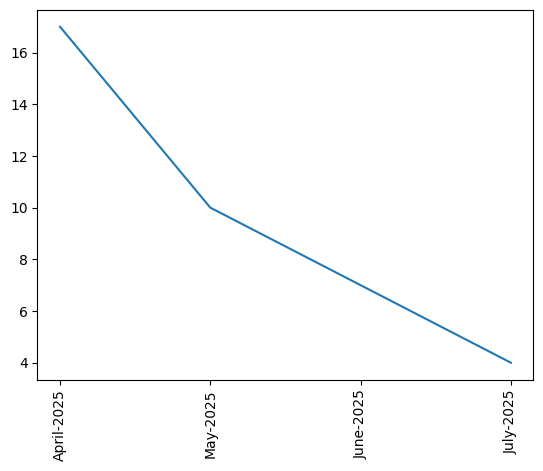

In [42]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [43]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎Messages and calls are end-to-end encrypted. ...,2025,April,20,22,37,4
1,2025-04-20 22:37:25,SAHA INSTITUTE SUNNY SIR,‎This chat has added privacy for your phone nu...,2025,April,20,22,37,4
2,2025-04-20 22:37:25,Sunny Sir,‎Sunny Sir created the community “SAHA INSTITU...,2025,April,20,22,37,4
3,2025-04-20 23:06:35,Sunny Sir,‎Welcome to the community!,2025,April,20,23,6,4
4,2025-04-21 15:12:46,Sunny Sir,"Dear Students,\n\nI hope you're all doing well...",2025,April,21,15,12,4
5,2025-04-21 16:18:26,Sunny Sir,‎Sunny Sir changed this community’s settings t...,2025,April,21,16,18,4
6,2025-04-21 16:20:33,Jatin Chaudhary,Hey everyone!\n\nSuper excited to be here wit...,2025,April,21,16,20,4
7,2025-04-21 19:52:39,Pankaj Sharma,"Hey guys \nPankaj here, sunny sir were my ment...",2025,April,21,19,52,4
8,2025-04-21 19:57:12,Sunny Sir,"""Ghayal parinda hai tu""\nUnique name and it's...",2025,April,21,19,57,4
9,2025-04-21 20:03:14,Priyanshi,"Hey guys,\nPriyanshi this side,\n\nSunny sir m...",2025,April,21,20,3,4


In [44]:
df['only_date']=df['date'].dt.date

In [45]:
df['only_date']

0     2025-04-20
1     2025-04-20
2     2025-04-20
3     2025-04-20
4     2025-04-21
5     2025-04-21
6     2025-04-21
7     2025-04-21
8     2025-04-21
9     2025-04-21
10    2025-04-21
11    2025-04-26
12    2025-04-26
13    2025-04-26
14    2025-04-26
15    2025-04-28
16    2025-04-28
17    2025-05-01
18    2025-05-02
19    2025-05-02
20    2025-05-03
21    2025-05-03
22    2025-05-19
23    2025-05-20
24    2025-06-03
25    2025-06-03
26    2025-06-04
27    2025-06-11
28    2025-06-11
29    2025-06-24
30    2025-07-06
31    2025-07-06
32    2025-07-06
33    2025-07-06
34    2025-05-01
35    2025-05-02
36    2025-05-02
37    2025-06-03
Name: only_date, dtype: object

In [56]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2025-04-20,4
1,2025-04-21,7
2,2025-04-26,4
3,2025-04-28,2
4,2025-05-01,2
5,2025-05-02,4
6,2025-05-03,2
7,2025-05-19,1
8,2025-05-20,1
9,2025-06-03,3


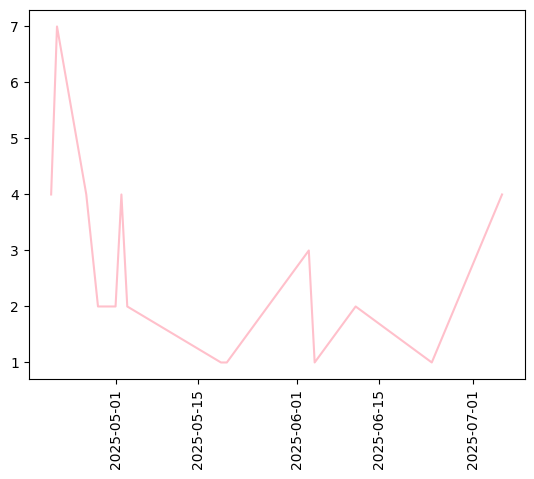

In [55]:
plt.plot(daily_timeline['only_date'],daily_timeline['message'],color="pink")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
plt.plot(daily_timeline['only_date'],message)

In [59]:
df['day_name']=df['date'].dt.day_name()

In [60]:
df['day_name']

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Monday
5        Monday
6        Monday
7        Monday
8        Monday
9        Monday
10       Monday
11     Saturday
12     Saturday
13     Saturday
14     Saturday
15       Monday
16       Monday
17     Thursday
18       Friday
19       Friday
20     Saturday
21     Saturday
22       Monday
23      Tuesday
24      Tuesday
25      Tuesday
26    Wednesday
27    Wednesday
28    Wednesday
29      Tuesday
30       Sunday
31       Sunday
32       Sunday
33       Sunday
34     Thursday
35       Friday
36       Friday
37      Tuesday
Name: day_name, dtype: object

In [ ]:
df.groupby('day_name').count()['message'] #both kinda do simmilar things in this particular case 

day_name
Friday        4
Monday       10
Saturday      6
Sunday        8
Thursday      2
Tuesday       5
Wednesday     3
Name: message, dtype: int64

In [65]:
df['day_name'].value_counts()

day_name
Monday       10
Sunday        8
Saturday      6
Tuesday       5
Friday        4
Wednesday     3
Thursday      2
Name: count, dtype: int64

In [70]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour ==23:
        period.append(str(hour) + "-" + str("00"))
    elif hour==0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

df['period']=period

In [71]:
df['period']

0     22-23
1     22-23
2     22-23
3     23-00
4     15-16
5     16-17
6     16-17
7     19-20
8     19-20
9     20-21
10    22-23
11    15-16
12    15-16
13    16-17
14    16-17
15    21-22
16    21-22
17    21-22
18    15-16
19    15-16
20    21-22
21    21-22
22    19-20
23     9-10
24    19-20
25    20-21
26      8-9
27    21-22
28    21-22
29    14-15
30     9-10
31     9-10
32    13-14
33    13-14
34    21-22
35      1-2
36      7-8
37    20-21
Name: period, dtype: object

In [ ]:
df.pivot_table(index="day_name",columns="period",values="message",aggfunc="count").fillna(0) #counting the no. of msg in each 

period,1-2,13-14,14-15,15-16,16-17,19-20,20-21,21-22,22-23,23-00,7-8,8-9,9-10
day_name,,,,,,,,,,,,,
Friday,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Monday,0.0,0.0,0.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
Saturday,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Sunday,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0
Thursday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Tuesday,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
